---
<a name='title'></a>
# **<font color="Navy"> Modelación Climática </font>**
## **<font color="RoyalBlue"> Práctica 1 Modelo 0 dimensional </font>**
### Escuela Nacional de Ciencias de la Tierra
#### Semestre 2024-II

---


In [23]:
import numpy as np
import matplotlib.pyplot as plt

### **<font color="Navy"> 1. Integrando la radiación solar. </font>**

1. Calcule la fracción del flujo radiante total del Sol y, luego, de la Tierra que se encuentra en el rango conocido como "visible" que es de 380 a 700 nm. 

Utilice los parámetros (T,h,k) utilizados en el notebook de clase y el método de simpson de scipy. 
Explique y discuta sus resultados en el contexto de la importancia de la longitud de onda de la radiación solar y terrestre para el clima terrestre. ¿Qué tan diferentes son estas fracciones y por qué es importante la diferencia?

2. Grafique el flujo acumulado $F_{c}$ de radiación emitida como función del número de onda, o de la longitud de onda para las temperaturas de 200, 300, 400 y 500 K. Explique los resultados que observa en su gráfica. 

Integre la emisión total hasta cada longitud de onda o número de onda iterativamente, guardando cada resultado en un arreglo. Tome como referencia la figura 3.2 del libro de Ray Pierrehumbert (panel inferior). Interprete sus resultados.

### **<font color="Navy"> 2. Grafique la curva de Planck para 5 temperaturas: 2500 K, 2000 K, 1750 K, 1500 K, 1250 K y luego grafique, en otra figura, la ley de Steffan Boltzmann y dibuje como puntos los valores específicos de Energía total como función de la temperatura para estas 5 temperaturas. </font>**



### **<font color="Navy"> 3. Haga una gráfica de línea de la temperatura de equilibrio o de la temperatura superficial terrestre, según el modelo 0 dimensional con efecto invernadero de 1 capa que absorbe toda la radiación terrestre. Haga la gráfica de la temperatura como función de la energía solar incidente $S_0$ pero considerando variable la distancia Sol-Tierra. </font>**

Para esto varíe el valor utilizado para la distancia Sol-Tierra en clase $\pm$ 1% y dibuje la gráfica para este intervalo. También puede hacer su gráfica distancia contra temperatura, en lugar de $S_0$ contra temperatura.
Responda si la variación en la temperatura por cambios en la constante solar es mayor o menor que por cambios en el albedo (ver ejercicio 5 de las notas de clase) y por qué. 


In [2]:
# Primero vamos a variar la distancia Sol-Tierra un 1%
d = 1.49e11 #El valor promedio
d_mas1 = (1/100 * d)+ d #más 1%
d_menos1 = d - (1/100 * d) #menos 1%

d_new = np.arange(d_menos1, d_mas1, 1e4)
print(f'Vector de distancia: {d_new}')

print(f'Distancia promedio: {d}')
print(f'Distancia promedio -1%: {d_menos1}')
print(f'Distancia promedio +1%: {d_mas1}')

Vector de distancia: [1.4751000e+11 1.4751001e+11 1.4751002e+11 ... 1.5048997e+11 1.5048998e+11
 1.5048999e+11]
Distancia promedio: 149000000000.0
Distancia promedio -1%: 147510000000.0
Distancia promedio +1%: 150490000000.0


In [3]:
# Ahora vamos a variar la constante solar con respecto a la distancia 
def solar_flux(d,L=3.846e26):
    # L es considerada constante
    S0 = L/(4*np.pi*(d**2))
    return S0
    
# evaluamos la funcion para las tres distancias 
S0 = solar_flux(d_new)
S02 = solar_flux(d)
print(f'Vector de constante solar: {S0}')
print(f'Constante solar promedio: {S02}')

Vector de constante solar: [1406.55425824 1406.55406753 1406.55387683 ... 1351.40121374 1351.40103414
 1351.40085454]
Constante solar promedio: 1378.5638285019356


In [4]:
# Seguido a esto, hay que calcular la temperatura de equilibrio 
def Te(S0,alpha=0.3): # Usamos un valor típico de albedo
    sigma=5.67e-8
    numerador=S0*(1-alpha)
    denominador=4*sigma
    fraccion=numerador/denominador
    T=(fraccion)**(1/4)
    return T

T_eq = Te(S0)
T1_eq = Te(S02)
print(f'Vector de temp. de equilibrio: {T_eq}')
print(f'Temp. de equilibrio promedio: {T1_eq}')

Vector de temp. de equilibrio: [256.6864064  256.6863977  256.686389   ... 254.1322746  254.13226615
 254.13225771]
Temp. de equilibrio promedio: 255.39974964549035


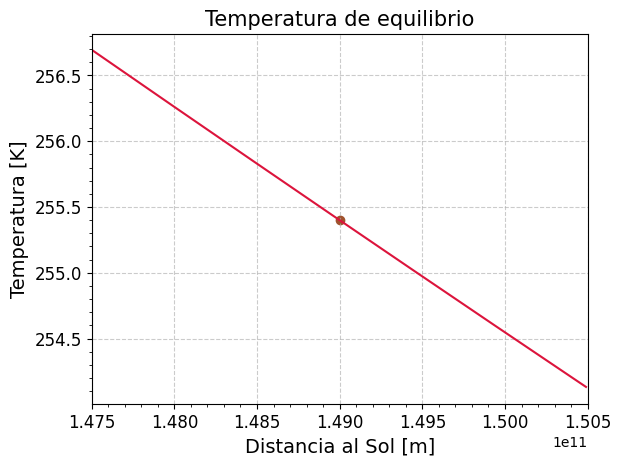

In [5]:
# Después de calcular los valores, hay que graficarlos y usamos la función de lineplot que tanto nos gusta:)
def lineplot_setup(xmin,xmax,xlab,ylab,ymin=None,ymax=None,title=None):
    # especificar limites minimos y maximos del grafico
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    # cuadrilla interna del grafico
    plt.grid(linestyle='--',alpha=0.66) #alpha representa transparencia 
    # queremos que se vean más detalles en los ejes, 
    plt.minorticks_on()
    # hacer las etiquetas de ambos ejes mas grandes
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(xlab,fontsize=14)
    plt.ylabel(ylab,fontsize=14)
    plt.title(title,fontsize=15)

plt.plot(d_new,T_eq, c="crimson")
plt.scatter(d, T1_eq, c = "sienna")
lineplot_setup(1.475e11,1.505e11,xlab='Distancia al Sol [m]',ylab='Temperatura [K]',title='Temperatura de equilibrio')

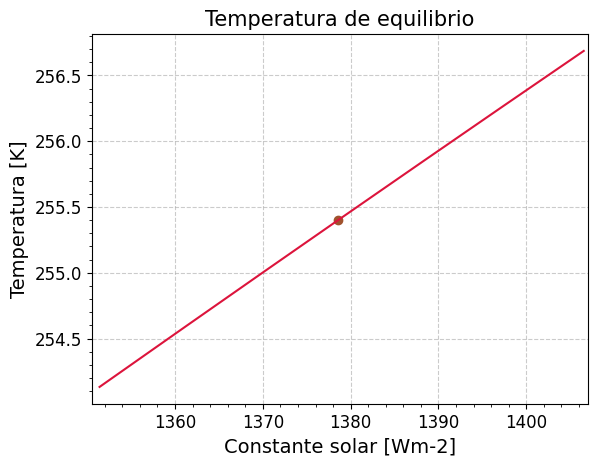

In [6]:
plt.plot(S0,T_eq, c="crimson")
plt.scatter(S02, T1_eq, c = "sienna")
lineplot_setup(1350.5,1407,xlab='Constante solar [Wm-2]',ylab='Temperatura [K]',title='Temperatura de equilibrio')

¿Varía más la temperatura por cambios en la constante solar?

La temperatura varía más con el albedo. En el gráfico hecho en clase, la temperatura se encuentra en un rango de 0 a 275 K, aproximadamente. Mientras que en el gráfico hecho, si cambiamos la constante solar, la temperatura se encuentra linealmente entre 256.6 a 254.13 K. Mismo que se puede observar con el punto rojo graficado , que es el promedio sin alguna variación.

Por consiguiente, el intervalo es mayor cuando se varía el albedo que la constante solar. Si bien la distancia a la estrella perjudica la constante solar, no es más que el albedo el principal parámetro que tiene resultados significativos en la temperatura. Ya que como este indica la fracción de luz que se refleja en la superficie, es más representativo en la temperatura global del planeta. 

### **<font color="Navy"> 4. ¿Cuántas capas son suficientes?  </font>**

- Genera una gráfica de contorno de la temperatura superficial del modelo de orden cero como función del albedo y el número de capas. 
- Utilice solamente hasta 10 capas y un valor típico para la Tierra de la constante solar. Utilice valores de $n$ para modelar de 0 a 10 capas. 
- Grafique o explique, cuántas capas son suficientes para tener una temperatura amigable de 300 K o más para casos donde el albedo es mayor a 2/3.



In [7]:
def Ts(alpha,S0,n=1):
    TE=Te(S0,alpha)
    Ts=(n+1)**(1/4)*TE
    return Ts

In [8]:
albedo = np.arange(0, 1, 0.01)
capas = np.arange(0, 10+1)
print(f'Constante solar promedio: {S02}')

Constante solar promedio: 1378.5638285019356


In [9]:
Ts_matrix=np.zeros((len(albedo),len(capas)))
print(Ts_matrix.shape)
print(Ts_matrix.size)
print(Ts_matrix[1,2])

(100, 11)
1100
0.0


In [10]:
for ia,alpha_i in enumerate(albedo): #i_a es el indice de las filas
    for i_n,ni in enumerate(capas): #i_n es el indice de columnas
        Ts_matrix[ia,i_n]=Ts(alpha_i,S02,ni)
print(np.mean(Ts_matrix))

339.17880834801736


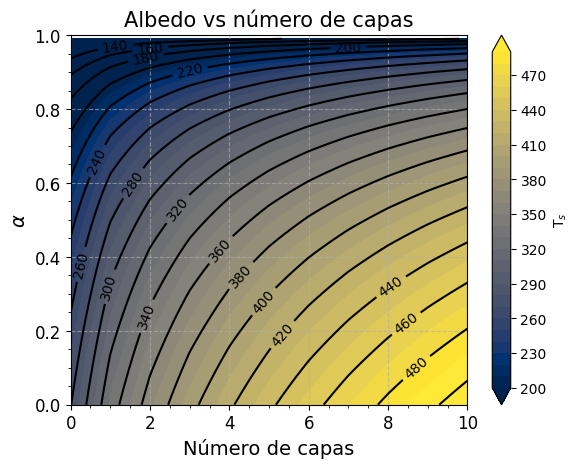

In [11]:
plt.contourf(capas,albedo,Ts_matrix,levels=np.arange(200,500,10),cmap='cividis',extend='both')
plt.colorbar(label='T$_{s}$')
cc=plt.contour(capas,albedo,Ts_matrix,levels=np.arange(140,550,20),colors='k')
plt.clabel(cc)
lineplot_setup(0,10,xlab='Número de capas',ylab=r'$\alpha$ ',
               ymin=0,ymax=1,title='Albedo vs número de capas')

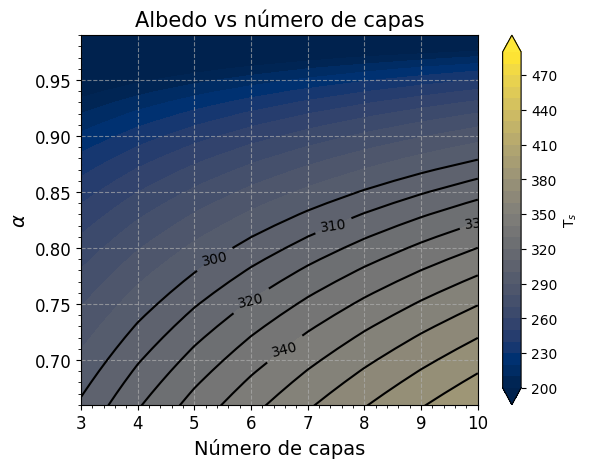

In [12]:
#Ahora vamos a delimitar una temperatura mayor a 300 K y un albedo mayor a 2/3

cap = np.arange(3,11) #Cambiamos el rango de capas
Ts_matrix_new=np.zeros((len(albedo),len(cap)))
for ia,alpha_i in enumerate(albedo): #i_a es el indice de las filas
    for i_n,ni in enumerate(cap): #i_n es el indice de columnas
        Ts_matrix_new[ia,i_n]=Ts(alpha_i,S02,ni)

plt.contourf(cap,albedo,Ts_matrix_new,levels=np.arange(200,500,10),cmap='cividis',extend='both')
plt.colorbar(label='T$_{s}$')
cc=plt.contour(cap,albedo,Ts_matrix_new,levels=np.arange(300,550,10),colors='k') #En levels empezamos en 300K en diferencias de 10
plt.clabel(cc)
lineplot_setup(3,10,xlab='Número de capas',ylab=r'$\alpha$ ',
               ymin=0.66,ymax=0.99,title='Albedo vs número de capas') #Se cambian los ejes x y y de las capas y albedo 

Para el caso donde la temperatura es mayor a 300K junto con un albedo mayor a 2/3 (0.66), se observa en los dos gráficos que estas curvas de nivel inician arriba de 1, por lo que no sería consistente varían radicalmente el número de capas. Por esto mismo, el nuevo vector va de 3 a 10 capas. No se tomó en cuenta un vector con las primeras dos capas, ya que al ser las primeras capas, la temperatura no alcanza los 300K. Los gráficos nos señalan que a mayor número de capas, la temperatura va aumentando y por consiguiente, el albedo baja. 

En cuanto a la metodología para cambiar el gráfico, se varió los límites del eje x y y, para así limitar el albedo a mayor de 0.66 y que el número de capas sea acorde al nuevo vector. Finalmente, se modificó el rango de "levels", para que solo se mostraran las curvas de nivel mayores iguales a 300K.

### **<font color="Navy"> 5. Utilice el cuadro siguiente para realizar las siguientes gráficas y cálculos. </font>**

*Tabla 1. Características de los planetas en el sistema Solar mostrando el radio del planeta, su distancia promedio al Sol, su albedo $\alpha$ y su temperatura superficial observada ($T_s$).*

<table ><tr><th >Planeta-Luna <th><th> Radio [km] <th><th> $d$ [10$^6$ km] <th><th> Albedo  <th><th>  $T_s$ [$K$] <tr><tr>
<tr><td> Mercurio   <td><td>  2440 <td><td> 58  <td><td>  0.1  <td><td> 441
<tr><td> Venus   <td><td>  6052 <td><td> 108  <td><td>  0.65  <td><td> 733
<tr><td> Marte   <td><td>  71490 <td><td> 228  <td><td>  0.15 <td><td> 240
<tr><td> Júpiter   <td><td>  71490 <td><td> 778  <td><td>  0.52 <td><td> 128
<tr><td> Saturno   <td><td>  60260 <td><td> 1430 <td><td>  0.47 <td><td> 95
<tr><td> Urano   <td><td>  25560 <td><td> 2878 <td><td>  0.5 <td><td> 49
<tr><td> Neptuno   <td><td>  1560 <td><td> 670 <td><td>  0.67 <td><td> 55
<td><tr><table>

a) Calcule la temperatura de equilibrio para cada planeta/luna utilizando el modelo cero-dimensional, primero sin considerar efecto invernadero y luego *con* efecto invernadero de 1 capa $f=0.5$. Explique en qué casos es mejor la aproximación con efecto invernadero y en qué casos no lo es. 

b) Grafique sus resultados en dos gráficas de dispersión, una con y otra sin efecto invernadero, donde muestre la temperatura de equilibrio como función de la distancia orbital. La gráfica más bonita obtendrá 3 puntos extra.

c) Grafique la función de Planck para la temperatura de equilibrio de cada planeta en un solo gráfico, utilizando una normalización de los datos adecuada de tal manera que cada línea se vea bien.
    
d) Ahora separe los planetas donde nuestro modelo de efecto invernadero de 1 capa es incapaz de representar bien la temperatura superficial del planeta en cuestión. Utilizando el modelo multi-capas encuentre aproximadamente cuántas capas serían necesarias para que la temperatura superficial del modelo sea parecido a la observada. 

### **<font color="Navy"> 6. El ángulo de declinación solar </font>**

Tomando el ejercicio donde modificamos el parámetro de distancia Tierra-Sol como ejemplo, ahora considere el ángulo de declinación solar. Recuerde a qué hace referencia este ángulo y cómo depende de la órbita terrestre. Así como se hizo para el parámetro $d$, juege con el parámetro $\delta$ para obtener diferentes versiones de cómo se podría ver este ángulo y vuelva a calcular $\bar{Q}$ para cada uno de sus experimentos. Obtenga resultados parecidos a los del ejercicio 7 de la práctica y explique detalladamente sus resultados físicamente.

En la última sección del Notebook 3, se mostró cómo graficar la insolación promedio diaria dependiendo de diferentes versiones del parámetro de la distancia Tierra-Sol. Ahora realice una gráfica multipanel donde el primer panel sea la gráfica de contorno original con la variación del ángulo de declinación solar observada, seguida de 3 paneles donde cada uno de ellos sea la diferencia entre las 3 versiones modificadas, por usted, del parámetro $\delta$, así como se hizo en el Notebook de clase. 

Explique detalladamente ¿qué está sucediendo físicamente con la insolación y por qué? ¿Logramos demostrar algo interesante o sólo nos perdimos en la jungla de NumPy?

### **<font color="Navy"> 7. Convirtiendo la insolación a temperatura </font>**

En el notebook 2, nos concentramos en analizar la temperatura superficial como función de parámetros como el albedo y el efecto invernadero. En el notebook 3, calculamos la insolación promedio diaria para cada latitud y día $\bar{Q}(\phi,d)$. Una estas dos expresiones y convierta nuestro gráfico de contorno de insolación a un gráfico de temperatura. 

Es importante considerar que nuestra variable insolación aún no considera el albedo. Suponga para este ejercicio que el albedo es exactamente igual en toda la superficie terrestre y de valor de 0.3.

Su resultado debe verse algo así. 

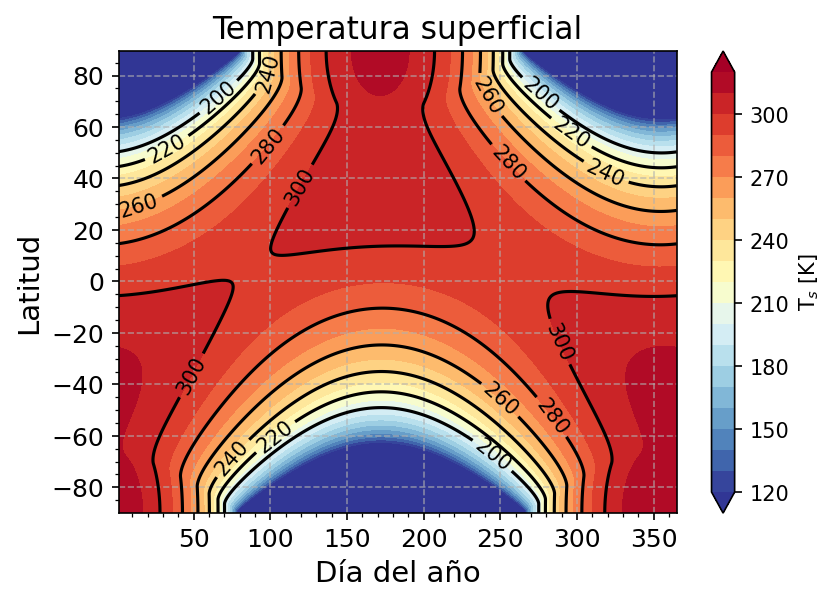

Interprete esta gráfica y explique cómo fue que llegó a poderla graficar. Es decir, elabore sobre cómo unió las ecuaciones vistas en clase y por qué. 


La ley de Stefan-Boltzmann indica que cuerpos con mayor temperatura emiten mayor energía y emisión:

\begin{align}
\sigma T^4 = \pi \int_0^\infty B_{v} (T) dv 
\end{align}

Ahora bien, la insolación es esa fracción de radiación extra que emite la superficie planetaria, por lo que podríamos decir que:

\begin{align}
Q-\alpha = \sigma T^{4}
\end{align}

Se resta el albedo al efecto invernadero, puesto que es un parámetro, que en este caso, es global para toda la superficie. Despejando T, nos queda:

\begin{align}
T_s = \sqrt[4]  \frac{Q-\alpha}{\sigma}
\end{align}


In [24]:
#Hacemos nuestra nueva función de temperatura superficial
def Temp_s(Q, alpha=0.3): #Q es nuestra insolación para cada latitud y día de nuestro notebook
    sigma= 5.67e-8
    numerador= Q-alpha
    frac= numerador/sigma
    Temp_s= (frac)**(1/4)
    return Temp_s

In [25]:
#Funciones necesarias para calcular Q
def theta_d(day):
    return 2*np.pi*day/365
def distance_to_sun(day):
    ans=[1.00011,0.034221,0.000719]
    bns=[0,0.001280,0.000077]
    suma=0
    for n,ai in enumerate(ans):
        suma+=ai*np.cos(n*theta_d(day))+bns[n]*np.sin(n*theta_d(day))
    return suma
def delta(day):
    ans=[0.006918,-0.399912,-0.006758,-0.002697]
    bns=[0,0.070257,0.000907,0.001480]
    suma=0
    for n,ai in enumerate(ans):
        suma+=ai*np.cos(n*theta_d(day))+bns[n]*np.sin(n*theta_d(day))
    return suma
def hour_angle(phi,day):
    argument=np.tan(np.deg2rad(phi))*np.tan(delta(day))
    # np arc cos es el arco coseno de un argumento
    h0=np.arccos(-argument)
    return h0

In [15]:
#Nuestra Q 
def Q_mean(phi,day,S_0=1367):
    # estimamos la distancia al sol para este dia particular
    d=distance_to_sun(day)
    # para este dia tambien obtenemos el angulo de declinacion solar
    Delta = delta(day)
    # ifs especiales para cuando no hay insolacion. 
    if (np.pi/2)-Delta<np.deg2rad(phi):
        h_0=np.deg2rad(180)
    elif -(np.pi/2)-Delta>np.deg2rad(phi):
        h_0=np.deg2rad(180)
    elif np.deg2rad(phi)>(np.pi/2)+Delta:
        h_0=0
    elif np.deg2rad(phi)<-(np.pi/2)+Delta:
        h_0=0
    else:
        h_0=hour_angle(phi,day)
    
    # calculamos la ecuacion especial
    Q_mean = (S_0/np.pi)*d*((h_0)*np.sin(np.deg2rad(phi))*np.sin(Delta)+np.cos(np.deg2rad(phi))*np.cos(Delta)*np.sin(h_0))
    return Q_mean

In [16]:
days=np.arange(1,366)
latitudes=np.arange(-90,90,0.5)

In [17]:
Q_all = np.zeros((len(latitudes),len(days)))
for ilat,lat in enumerate(latitudes):
    for idd,day in enumerate(days):
        Q_all[ilat,idd]=Q_mean(lat,day)

In [18]:
Temp_s(Q_all)
print(Temp_s[10,10])

/tmp/ipykernel_1814/547694052.py:6: RuntimeWarning: invalid value encountered in power
  Temp_s= (frac)**(1/4)


TypeError: 'function' object is not subscriptable

TypeError: Input z must be 2D, not 0D

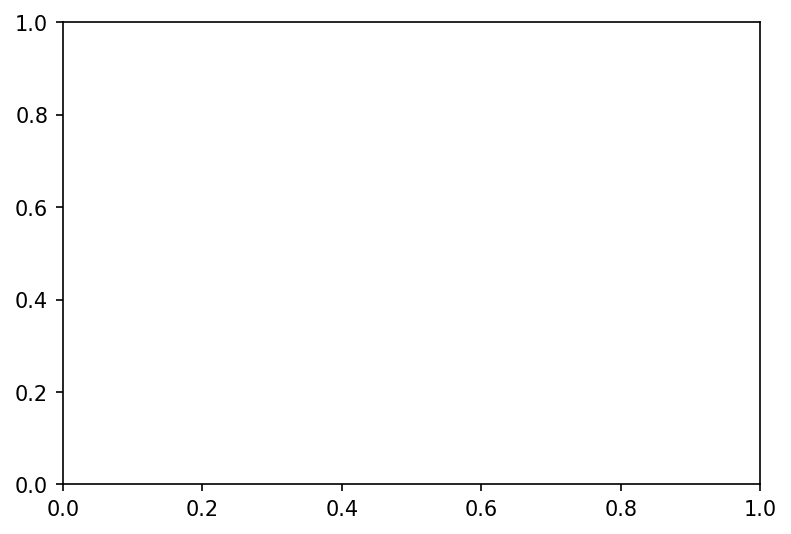

In [26]:
plt.figure(figsize=(6,4),dpi=150)
plt.contourf(days,latitudes,Temp_s,levels=np.arange(0,551,50),extend='max')
plt.colorbar(label='Insolación W m$^{-2}$')
cc=plt.contour(days,latitudes,Temp_s,levels=np.arange(0,701,100),colors='k')
plt.clabel(cc)
plt.xlabel('Día del año',fontsize=15)
plt.ylabel('Latitud',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

A pesar de no correr el código:( podemos hacer el análisis del gráfico presentado

A diferencia de la primera gráfica, donde se compara la insolación, se muestra el de la temperatura superficial con algunas similitudes. A latitudes altas, como 60° a 90°, a finales y principios del año (invierno) la temperatura es baja hasta 120K. Por el otro lado, en el hemisferio Sur, no es sino en mitades del año que se alcanzan las bajas temperaturas, nuestro verano es su invierno. Mismo resultado que en la insolación, los niveles más bajos se alcanzan a principios del año en el hemisferio Norte y en el Sur a mitad del año.

Asimismo, cuando la temperatura alcanza su máximo en los polos ocurre a mitad del año para el hemisferio Norte. En cambio para el Sur es a finales y principios del año. Por el otro lado, se observa una temperatura más constante en el ecuador, puesto que el flujo de radiación es mayor en latitudes 0° que a -90° y 90°. Finalmente, las variaciones de temperatura entre los invernos y veranos de los polos se aprecia por la diferencia en la distancia al Sol en cada etapa. No es el mismo flujo de radiación que llega cuando el hemisferio Norte pasa su invierno que cuando lo pasa el Sur, esto se puede observar en las variaciones de temperatura.

### **<font color="Navy"> 8a La zona habitable </font>**

#### Equipos: Planetitas, Nubecitas y Acrecionistas.

Considere el concepto de la zona habitable (https://exoplanets.nasa.gov/search-for-life/habitable-zone/). 

1. Utilizando el modelo cero dimensional escriba una serie de funciones que calcule la temperatura de equilibrio como función de a) la luminosidad o brillo de la estrella, b) la distancia entre la estrella y el planeta, y c) el parámetro de efecto invernadero. 

Considere todos los valores observados de brillo que hemos observado en los diferentes tipos de estrellas. Para esto, investigue tipos de clasificación de estrellas y justifique el rango de temperaturas que escogió para este ejercico con base en su investigación. 

2. Grafique la temperatura de equilibrio como función de los parámetros b) y c) anteriores en un gráfico de contorno. Utilice distancias parecidas a las del Sistema Solar. Por ejemplo, un arreglo podría ir desde la distancia entre el Sol y Mercurio hasta la distancia con Plutón.

3. En ese gráfico de contorno, señale gráfica a través de un contorno extra (por ejemplo: `plt.contour`) cuál sería la zona habitable. Para esto, defina primero su zona habitable a través de un rango de temperatura. Por ejemplo, si es team calor, quizá su zona habitable sea de 10$^\circ$C a 40$^\circ$C. Pero el concepto de zona habitable no se trata de team frío versus team calor sino de condiciones en las que sería factible albergar vida humana. Justifique su rango de temperatura escogido.


### **<font color="Navy"> 8b El modelo de 2 capas </font>**

#### Equipos: Anticiclónicos y Eddies

En clase derivamos el modelo de 2 capas asumiendo que las dos capas absorbían toda la radiación saliente de la superficie. Ahora escriba el modelo, y su solución pero considerando que las capas absorben una fracción diferente de cero $f_1$ y $f_2$. Considere $S_0$ y el albedo constantes y con los valores utilizados en los notebooks de clase. 

1. Escriba las soluciones para cada capa en funciones de Python.

2. Grafique la temperatura de la superficie, la capa 1 y la capa 2 en gráficos de línea como función primero de $f_1$ en un subplot y luego de $f_2$. 

3. Haga un gráfico de contorno de la temperatura superficial y la temperatura de la capa más alta con $f_2$ en el eje "x" y $f_1$ en el eje "y". 

4. Utilizando sus resultados conteste. Qué valores de estos dos parámetros son consistentes con la temperatura promedio observada. Explique la importancia de la diferencia en la vertical de los parámetros $f_1$ y $f_2$.

### **<font color="Navy"> 9 Lectura y preguntas </font>**
#### **<font color="DodgerBlue"> El efecto invernadero de "The Warming Papers" </font>**
- Fourier, J. (1827). Mémoire sur les Températures du Globe Terrestre et des Espaces Planétaires. Mémoires de l Académie Royale des Sciences, 7, 569-604. 25 pages. 

1. Exactamente ¿cómo es que Fourier llega al argumento de que la atmósfera debe calentar la superficie? ¿Cómo lo argumenta en el artículo?
2. Según Fourier, de no ser por el Sol, ¿cuál sería la temperatura terrestre y por qué? 
3. Fourier llega a una conclusión muy importante sobre cómo se distribuye el calor hacia el subsuelo. En particular, habla sobre cómo la temperatura atmosférica y la del subsuelo tienen diferente variabilidad espacial y temporal. Explique este argumento. 
4. Describa el aparato que utilizó Fourier para explicar cómo el vidrio tiene interacciones diferentes con la radiación solar y la térmica. Explique cómo este experimento provee un símil directo con el efecto invernadero atmosférico. 
5. ¿Cuál es el gran error de Fourier en este artículo y cómo se corrige?


# Extras

### **<font color="Navy"> 1. Escriba una función en Python que calcule la integral de una curva utilizando rectángulos espaciados. </font>**

Pruebe sus resultados integrando la función $f(x)=x^2$ entre -3 y 3. Compare y contraste sus resultados con los del método de trapecio y los del método de simpson utilizando intervalos para su integración de 0.1, 0.01 y 0.001. ¿Qué tanto mejora su aproximación si aumenta el intervalo? ¿Qué metodo se aproxima más al resultado analítico (sí, usted debe saber integrar y evaluar la integral). 


### **<font color="Navy"> 2. La paradoja del Sol débil </font>**

La paradoja del Sol débil y joven establece que al inicio de la historia del planeta, el Sol debió haber tenido una menor luminosidad, en particular, las observaciones indican que la constante solar era sólo 70\% que la actual. Utilizando el modelo 0 dimensional de 1 capa con efecto invernadero, encuentre el rango de parámetros de albedo y efecto invernadero para que la mayor parte de la Tierra pudiera albergar agua. Por ejemplo, considere que la temperatura promedio terrestre debió haber sido de alrededor de 283 K. 

In [20]:
#Tenemos que el 70% de la constante actual es:
S02 = solar_flux(d)
print(f'Constante solar promedio: {S02}')
S0_new = (S02 * 70)/ 100
print(f'70 % de la constante solar: {S0_new}')

Constante solar promedio: 1378.5638285019356
70 % de la constante solar: 964.9946799513549


In [21]:
#Vamos a graficar el albedo y el efecto invernadero para determinar para ver dónde se espera una T=283K
f = np.arange(0,1.01,0.025)
Ts_matrix_new=np.zeros((len(albedo),len(f))) #albedo ya fue definido en el ejercicio 3

for ia,alpha_i in enumerate(albedo):
    for i_f,fi in enumerate(f):
        Ts_matrix_new[ia,i_f]=Ts(alpha_i,S0_new,fi)

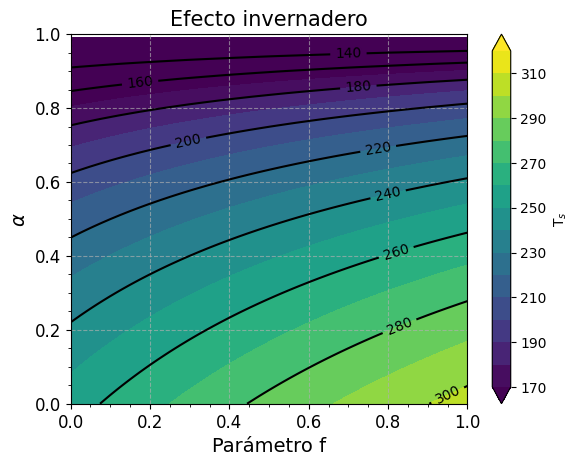

In [22]:
plt.contourf(f,albedo,Ts_matrix_new,levels=np.arange(170,330,10),cmap='viridis',extend='both')
plt.colorbar(label='T$_{s}$')
cc=plt.contour(f,albedo,Ts_matrix_new,levels=np.arange(140,330,20),colors='k')
plt.clabel(cc)
lineplot_setup(0,1,xlab='Parámetro f',ylab=r'$\alpha$ ',
               ymin=0,ymax=1,title='Efecto invernadero')

El valor de constante solar bajó de 1378 a 965 Wm-2. Además, el agua líquida va en un rango de temperatura de 273.15 K a 373.15 K, tomando como promedio el nivel del mar. De acuerdo a nuestra gráfica y considerando que la temperatura terrestre tuvo que ser de 283 K, para que el agua estuviera en su mayoría líquida el planeta tuvo que tener un albedo menor o igual a 0.2 y un efecto invernadero mayor o igual a 0.4. Por ello, en un inicio podemos suponer que la atmósfera primitiva era principalmente de vapor de agua, CO2 y azufre (GEI's) por la actividad volcánica y para mantener el agua líquida.

### **<font color="Navy"> 3. El rol del Sol en el cambio climático actual </font>**

Se dice frecuentemente que el cambio climático actual tiene causas naturales. Muchas veces se utiliza al Sol y sus ciclos para argumentar que el clima mismo es cíclico y sigue al pie de la letra al Sol. En los últimos 400 años, hemos podido observar las variaciones del Sol con cierto grado de confianza. En estas observaciones, hemos podido observar un aumento  en la constante solar de alrededor de 0.2% en la constante solar. Calcule cuál es el impacto de este cambio en largo plazo de la constante solar y qué podemos inferir a partir de ello del rol del Sol en el cambio climático actualmente observado.